# 키워드 분석

In [ ]:
ratings_okt = '/home/kyuyeon/문서/kmu/23-1/bigdata-latest/movie/data/ratings-okt.csv'
ratings_mec = '/home/kyuyeon/문서/kmu/23-1/bigdata-latest/movie/data/ratings-mec.csv'

## Word Count

In [ ]:
from collections import Counter
import pandas as pd
import ast

def word_counter(filename):
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Evaluate 'tokens' column using ast.literal_eval
    df['tokens'] = df['tokens'].apply(ast.literal_eval)
    
    # Combine the lists in the 'tokens' column into one list
    combined_list = [item for sublist in df['tokens'] for item in sublist]
    
    # Count occurrences of words using Counter
    counts = Counter(combined_list)
    
    return counts

In [ ]:
okt_count = word_counter(ratings_okt)
mec_count = word_counter(ratings_mec)

In [ ]:
print(f'counter of okt: {okt_count.most_common(10)}')
print(f'counter of mec: {mec_count.most_common(10)}')

counter of okt: [('영화', 57883), ('정말', 11748), ('진짜', 10643), ('평점', 8394), ('최고', 7805), ('연기', 7047), ('스토리', 6734), ('이영화', 6516), ('감동', 6341), ('드라마', 6268)]
counter of mec: [('영화', 75236), ('거', 9835), ('연기', 8901), ('최고', 8586), ('평점', 8238), ('스토리', 7020), ('드라마', 6703), ('게', 6551), ('듯', 6519), ('감동', 6309)]


In [ ]:
# 한 글자 키워드를 제거합니다.
okt_count = Counter({x : okt_count[x] for x in okt_count if len(x) > 1})
mec_count = Counter({x : mec_count[x] for x in mec_count if len(x) > 1})

print(f'counter of okt: {okt_count.most_common(10)}')
print(f'counter of mec: {mec_count.most_common(10)}')

counter of okt: [('영화', 57883), ('정말', 11748), ('진짜', 10643), ('평점', 8394), ('최고', 7805), ('연기', 7047), ('스토리', 6734), ('이영화', 6516), ('감동', 6341), ('드라마', 6268)]
counter of mec: [('영화', 75236), ('연기', 8901), ('최고', 8586), ('평점', 8238), ('스토리', 7020), ('드라마', 6703), ('감동', 6309), ('배우', 5643), ('내용', 5602), ('감독', 5550)]


## WordCloud

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def wordcloud(count, tagger):
    wc = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # 사용할 폰트
        background_color='white', # 배경색
        max_words=100, # 최대 빈도수를 기준으로 출력할 단어 수
        max_font_size=70, # 최대 폰트 크기
        colormap='hsv' # 컬러 스타일 ex)'Accent', 'Accent_r', 'Blues', 'Blues_r' 등등
    ).generate_from_frequencies(dict(count))
    wc.to_file('/home/kyuyeon/문서/kmu/23-1/bigdata-latest/movie/wordcloud/wordcloud-' + tagger + '.png')

    plt.figure()
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear') 
    plt.show()

### 형태소분석기 별 키워드 분석

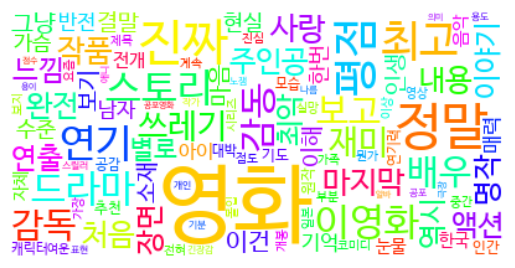

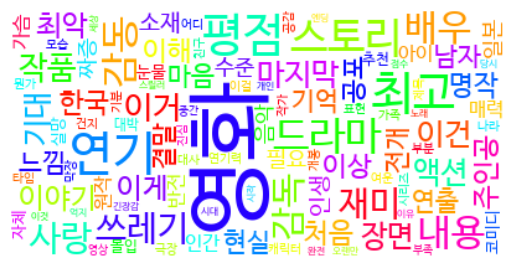

In [ ]:
for count, tagger in zip([okt_count, mec_count], ['okt', 'mec']):
    wordcloud(count, tagger)

In [ ]:
okt_total = 0
mec_total = 0

for key, value in okt_count.items():
    okt_total += value
for key, value in mec_count.items():
    mec_total += value

print(f'total of okt: {okt_total}')
print(f'total of mec: {mec_total}')

total of okt: 855799
total of mec: 751580


In [ ]:
# 2가지 토크나이저의 키워드 별 비율 합치기, (해당 키워드 빈도수) / (전체 키워드 수)
okt_count = Counter({x: (okt_count[x]/okt_total)*10000 for x in okt_count})
mec_count = Counter({x: (mec_count[x]/mec_total)*10000 for x in mec_count})

print(f'counter of okt: {okt_count.most_common(10)}')
print(f'counter of mec: {mec_count.most_common(10)}')

counter of okt: [('영화', 676.3620896962955), ('정말', 137.27522467308327), ('진짜', 124.3633142829099), ('평점', 98.08377901820405), ('최고', 91.20132180570438), ('연기', 82.34410182764879), ('스토리', 78.68670096599784), ('이영화', 76.13937384829849), ('감동', 74.09450116207194), ('드라마', 73.241497127246)]
counter of mec: [('영화', 1001.0378136725299), ('연기', 118.43050639985098), ('최고', 114.23933579924957), ('평점', 109.60909018334708), ('스토리', 93.40323052768834), ('드라마', 89.18544932009898), ('감동', 83.94315974347374), ('배우', 75.08182761648793), ('내용', 74.53631017323505), ('감독', 73.84443439154848)]


In [ ]:
set_count = okt_count + mec_count

print(f'counter of set: {set_count.most_common(10)}')

counter of set: [('영화', 1677.3999033688253), ('평점', 207.69286920155113), ('최고', 205.44065760495397), ('연기', 200.77460822749975), ('스토리', 172.08993149368618), ('드라마', 162.426946447345), ('감동', 158.0376609055457), ('배우', 138.65984067796614), ('정말', 137.67438377790245), ('감독', 135.16724500478827)]


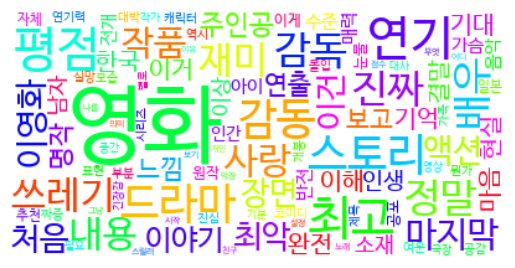

In [ ]:
wordcloud(set_count, 'set')

### 라벨 별 키워드 분석

In [ ]:
from collections import Counter
import pandas as pd
import ast

def label_counter(filename, label):
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Evaluate 'tokens' column using ast.literal_eval
    df['tokens'] = df['tokens'].apply(ast.literal_eval)
    
    # Filter rows where 'label' is not equal to 1
    df = df[df['label'] == label]
    
    # Combine the lists in the 'tokens' column into one list
    combined_list = [item for sublist in df['tokens'] for item in sublist]
    
    # Count occurrences of words using Counter
    counts = Counter(combined_list)
    
    return counts

In [ ]:
okt_count_1 = label_counter(ratings_okt, 1)
okt_count_0 = label_counter(ratings_okt, 0)
mec_count_1 = label_counter(ratings_mec, 1)
mec_count_0 = label_counter(ratings_mec, 0)

# 한 글자 키워드를 제거합니다.
okt_count_1 = Counter({x : okt_count_1[x] for x in okt_count_1 if len(x) > 1})
okt_count_0 = Counter({x : okt_count_0[x] for x in okt_count_0 if len(x) > 1})
mec_count_1 = Counter({x : mec_count_1[x] for x in mec_count_1 if len(x) > 1})
mec_count_0 = Counter({x : mec_count_0[x] for x in mec_count_0 if len(x) > 1})

print('-----------------------True--------------------------')
print(f'counter of okt 1: {okt_count_1.most_common(10)}')
print(f'counter of mec 1: {mec_count_1.most_common(10)}')
print('-----------------------False-------------------------')
print(f'counter of okt 0: {okt_count_0.most_common(10)}')
print(f'counter of mec 0: {mec_count_0.most_common(10)}')

-----------------------True--------------------------
counter of okt 1: [('영화', 29652), ('정말', 7832), ('최고', 7220), ('진짜', 5181), ('감동', 5018), ('연기', 4030), ('드라마', 3782), ('이영화', 3622), ('평점', 3550), ('보고', 3033)]
counter of mec 1: [('영화', 38877), ('최고', 7954), ('연기', 5046), ('감동', 4989), ('드라마', 3958), ('사랑', 3703), ('평점', 3486), ('배우', 2666), ('스토리', 2522), ('작품', 2437)]
-----------------------False-------------------------
counter of okt 0: [('영화', 28231), ('진짜', 5462), ('평점', 4844), ('스토리', 4359), ('쓰레기', 4328), ('정말', 3916), ('감독', 3560), ('연기', 3017), ('최악', 2912), ('이영화', 2894)]
counter of mec 0: [('영화', 36359), ('평점', 4752), ('스토리', 4498), ('쓰레기', 4225), ('내용', 3862), ('연기', 3855), ('감독', 3774), ('배우', 2977), ('최악', 2916), ('재미', 2847)]


counter of okt_1: {'보고': 3033, '디자인': 21, '학생': 108, '외국': 62, '디자이너': 10, '일군': 1, '전통': 19, '통해': 243, '발전': 83, '문화': 107, '산업': 11, '우리나라': 458, '어려운': 1, '시절': 354, '열정': 145, '노라노': 1, '갈수': 20, '폴리스스토리': 20, '시리즈': 730, '부터': 75, '최고': 7220, '연기': 4030, '진짜': 5181, '몰입': 682, '다그': 275, '안개': 14, '밤하늘': 5, '초승달': 1, '사랑': 2949, '라면': 412, '처음': 1403, '완전': 1788, '감동': 5018, '전쟁': 382, '바보': 96, '나이': 282, '사하나': 77, '감정': 501, '고질': 4, '오페라': 39, '고해': 54, '작품': 2296, '극단': 42, '갈림': 2, '반전': 851, '평점': 3550, '긴장감': 534, '스릴': 397, '전장': 5, '공포': 340, '고시': 6, '소재': 665, '관련': 63, '단연': 113, '가면': 62, '갈수록': 213, '더욱': 287, '밀회': 4, '화이팅': 332, '작일': 7, '본영': 205, '제대로': 284, '범죄': 63, '스릴러': 453, '한마디': 205, '밤잠': 4, '징텅': 2, '교복': 7, '이의': 28, '볼펜': 2, '자국': 3, '역시': 1765, '미처': 8, '전하': 45, '한마음': 30, '형태': 23, '마지막': 2419, '강압': 3, '용서': 94, '세뇌': 11, '비판': 103, '중세시대': 7, '제니퍼': 53, '코넬': 15, '아역시절': 3, '로버트': 75, '드니': 61, '장면': 1334, '정말': 7832, '가슴속': 51, '기억': 1239, '명작

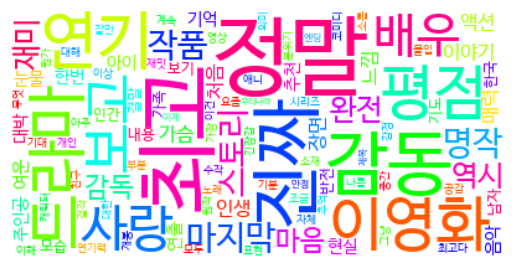

counter of okt_0: {'영화로': 483, '관객': 591, '작품': 1406, '선구': 3, '안이': 15, '배우': 2836, '김태희': 37, '최대': 73, '약점': 10, '멘스': 19, '퓨젼': 2, '이건': 1801, '완죤': 25, '이지현': 11, '환상': 86, '연기': 3017, '아빠': 194, '낭비': 456, '차라리': 890, '포르노': 134, '심리': 97, '묘사': 112, '폭력': 120, '원작': 987, '그냥': 1654, '쓰레기': 4328, '분량': 70, '작가': 837, '가발': 31, '박현지': 28, '범죄': 158, '주인공': 1810, '심회': 1, '김치': 68, '따귀': 7, '의심': 75, '엄마': 333, '개입': 9, '증거': 35, '잡지': 19, '감방': 7, '패턴': 34, '무한': 33, '반복': 115, '종합': 37, '평점': 4844, '이도': 93, '하자': 188, '조윤희': 6, '때책': 1, '시작': 540, '직전': 21, '몰입': 474, '어이': 164, '머리': 389, '바로': 185, '고문': 52, '마지막': 1129, '청력': 1, '어딘가': 23, '여배우': 296, '등등': 71, '부조리': 8, '이그': 85, '상어': 65, '하드코어': 8, '그나': 10, '마개': 3, '조금': 383, '고가': 25, '디테': 13, '장면': 1185, '제트': 5, '스키': 14, '보기': 1116, '전혀': 824, '재미': 2771, '공포영화': 628, '스토리': 4359, '성룡': 199, '시도': 157, '별하나': 153, '감독': 3560, '택시': 48, '기사': 37, '불만': 34, '새끼': 271, '제안': 34, '인생': 556, '최악': 2912, '개인': 338, '킬링타임'

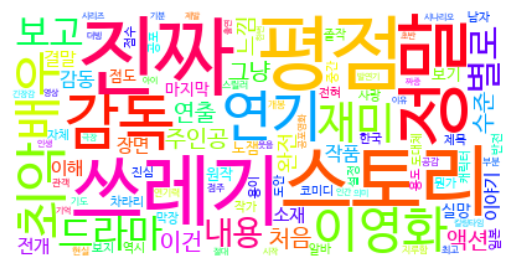

counter of mec_1: {'디자인': 21, '학생': 97, '외국': 59, '디자이너': 10, '전통': 20, '발전': 85, '문화': 149, '산업': 16, '나라': 693, '시절': 681, '열정': 165, '노라노': 1, '감사': 540, '폴리스': 21, '스토리': 2522, '시리즈': 792, '최고': 7954, '연기': 5046, '몰입': 886, '안개': 15, '밤하늘': 5, '초승달': 1, '사랑': 3703, '처음': 1140, '감동': 4989, '전쟁': 538, '바보': 101, '나이': 390, '훗날': 12, '보면대': 2, '감정': 561, '완벽': 642, '이해': 1034, '고질라': 13, '니무': 1, '오페라': 46, '작품': 2437, '극단': 42, '적평': 2, '도반': 2, '평점': 3486, '긴장감': 541, '스릴감': 44, '전장': 8, '공포': 697, '고시': 5, '이터': 10, '소재': 694, '관련': 64, '밀회': 3, '화이팅': 281, '상당': 58, '수작': 786, '일본': 654, '마음': 1725, '임팩트': 46, '일품': 134, '오랜만': 784, '범죄': 106, '스릴러': 471, '한마디': 188, '밤잠': 4, '교복': 7, '자이': 1, '볼펜': 2, '자국': 3, '다전': 3, '형태': 23, '마지막': 2396, '강압': 3, '용서': 98, '세뇌': 9, '비판': 110, '중세': 22, '시대': 633, '명작': 2303, '영상': 602, '존재': 268, '제니퍼코넬리': 10, '아역': 104, '로버트드니로': 39, '장면': 1753, '가슴': 1558, '기억': 1612, '인간': 1114, '잠재': 7, '악마': 66, '공간': 81, '존속': 1, '다큐': 273, '도광': 1, '재현

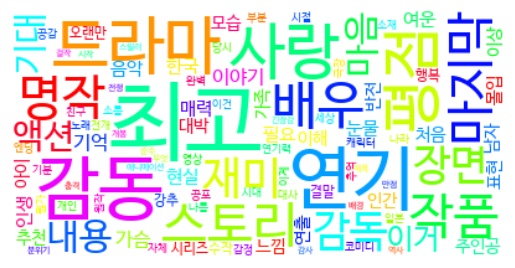

counter of mec_0: {'관객': 628, '작품': 1489, '선구안': 1, '배우': 2977, '김태희': 35, '최대': 73, '약점': 10, '사극': 114, '멘스': 19, '이건': 2697, '유치': 400, '이지현': 9, '환상': 88, '연기': 3855, '아빠': 209, '낭비': 607, '포르노': 129, '심리': 102, '묘사': 114, '중요': 200, '폭력': 128, '원작': 1122, '쓰레기': 4225, '분량': 74, '작가': 922, '발악': 27, '걸로': 164, '박현지': 27, '범죄': 187, '주인공': 1479, '회장': 29, '김치': 75, '따귀': 6, '엄마': 339, '개입': 8, '증거': 34, '현지': 14, '감방': 7, '패턴': 34, '무한': 31, '반복': 126, '종합': 38, '평점': 4752, '도저': 109, '건지': 1145, '조윤희': 5, '고문': 63, '시작': 587, '직전': 22, '몰입': 561, '머리': 370, '마지막': 1139, '청력': 1, '회복': 9, '어딘가': 26, '이상': 1495, '여배우': 308, '등등': 82, '사회부': 1, '조리': 5, '상어': 70, '하드코어': 8, '거지': 209, '디테일': 38, '장면': 1451, '제트': 6, '스키': 6, '재미': 2847, '공포': 1300, '스토리': 4498, '성룡': 186, '턱시도': 1, '감독': 3774, '택시': 48, '기사': 52, '불만': 28, '새끼': 240, '인생': 546, '최악': 2916, '개인': 363, '킬링': 545, '타임': 767, '로맨틱': 129, '코미디': 916, '개구리': 14, '자연': 125, '전편': 194, '액션': 1725, '감동': 1320, '영거': 3, '시기': 5

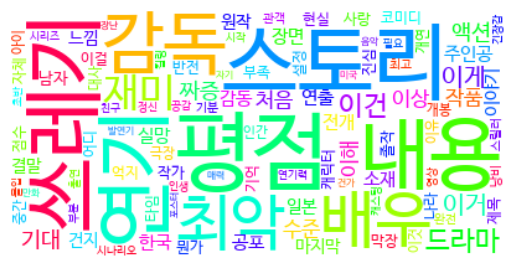

In [ ]:
# 일정 thresholed_percentage 이하의 단어들만 추출 -> 지배적인 단어를 제거하기 위함
for count, tagger in zip([okt_count_1, okt_count_0, mec_count_1, mec_count_0], ['okt_1', 'okt_0', 'mec_1', 'mec_0']):
    # Get the total count of all keywords
    total_count = sum(count.values())

    # Set a threshold as a percentage of the total count
    threshold_percentage = 0.05  # You can adjust this value as needed

    # Extract the keywords that do not exceed the frequency threshold
    filtered_keywords = {keyword: count for keyword, count in count.items() if count/total_count <= threshold_percentage}
    print(f'counter of {tagger}: {filtered_keywords}')

    wordcloud(filtered_keywords, tagger)

counter of okt_11: {'디자인': 21, '학생': 108, '외국': 62, '디자이너': 10, '일군': 1, '전통': 19, '통해': 243, '발전': 83, '문화': 107, '산업': 11, '우리나라': 458, '어려운': 1, '시절': 354, '열정': 145, '노라노': 1, '갈수': 20, '폴리스스토리': 20, '시리즈': 730, '부터': 75, '최고': 7220, '연기': 4030, '몰입': 682, '다그': 275, '안개': 14, '밤하늘': 5, '초승달': 1, '사랑': 2949, '라면': 412, '처음': 1403, '감동': 5018, '전쟁': 382, '바보': 96, '나이': 282, '사하나': 77, '감정': 501, '고질': 4, '오페라': 39, '고해': 54, '작품': 2296, '극단': 42, '갈림': 2, '반전': 851, '평점': 3550, '긴장감': 534, '스릴': 397, '전장': 5, '공포': 340, '고시': 6, '소재': 665, '관련': 63, '단연': 113, '가면': 62, '갈수록': 213, '더욱': 287, '밀회': 4, '화이팅': 332, '작일': 7, '본영': 205, '제대로': 284, '범죄': 63, '스릴러': 453, '한마디': 205, '밤잠': 4, '징텅': 2, '교복': 7, '이의': 28, '볼펜': 2, '자국': 3, '역시': 1765, '미처': 8, '전하': 45, '한마음': 30, '형태': 23, '마지막': 2419, '강압': 3, '용서': 94, '세뇌': 11, '비판': 103, '중세시대': 7, '제니퍼': 53, '코넬': 15, '아역시절': 3, '로버트': 75, '드니': 61, '장면': 1334, '가슴속': 51, '기억': 1239, '명작': 2231, '저런': 136, '인간': 949, '잠재': 8, '악마': 7

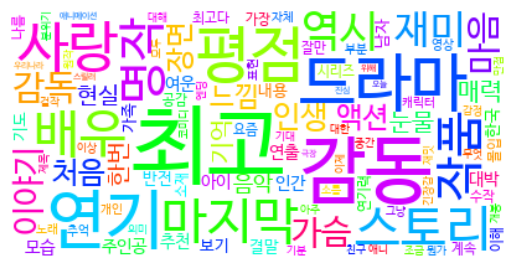

counter of okt_00: {'영화로': 483, '관객': 591, '작품': 1406, '선구': 3, '안이': 15, '배우': 2836, '김태희': 37, '최대': 73, '약점': 10, '멘스': 19, '퓨젼': 2, '완죤': 25, '이지현': 11, '환상': 86, '연기': 3017, '아빠': 194, '낭비': 456, '차라리': 890, '포르노': 134, '심리': 97, '묘사': 112, '폭력': 120, '원작': 987, '그냥': 1654, '쓰레기': 4328, '분량': 70, '작가': 837, '가발': 31, '박현지': 28, '범죄': 158, '주인공': 1810, '심회': 1, '김치': 68, '따귀': 7, '의심': 75, '엄마': 333, '개입': 9, '증거': 35, '잡지': 19, '감방': 7, '패턴': 34, '무한': 33, '반복': 115, '종합': 37, '평점': 4844, '이도': 93, '하자': 188, '조윤희': 6, '때책': 1, '시작': 540, '직전': 21, '몰입': 474, '어이': 164, '머리': 389, '바로': 185, '고문': 52, '마지막': 1129, '청력': 1, '어딘가': 23, '여배우': 296, '등등': 71, '부조리': 8, '이그': 85, '상어': 65, '하드코어': 8, '그나': 10, '마개': 3, '조금': 383, '고가': 25, '디테': 13, '장면': 1185, '제트': 5, '스키': 14, '보기': 1116, '전혀': 824, '재미': 2771, '공포영화': 628, '스토리': 4359, '성룡': 199, '시도': 157, '별하나': 153, '감독': 3560, '택시': 48, '기사': 37, '불만': 34, '새끼': 271, '제안': 34, '인생': 556, '최악': 2912, '개인': 338, '킬링타임': 545, '로맨틱

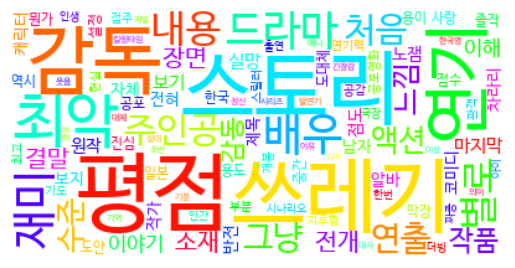

counter of mec_11: {'디자인': 21, '학생': 97, '외국': 59, '디자이너': 10, '전통': 20, '발전': 85, '문화': 149, '산업': 16, '나라': 693, '시절': 681, '열정': 165, '노라노': 1, '감사': 540, '폴리스': 21, '스토리': 2522, '시리즈': 792, '최고': 7954, '연기': 5046, '몰입': 886, '안개': 15, '밤하늘': 5, '초승달': 1, '사랑': 3703, '처음': 1140, '감동': 4989, '전쟁': 538, '바보': 101, '나이': 390, '훗날': 12, '보면대': 2, '감정': 561, '완벽': 642, '이해': 1034, '고질라': 13, '니무': 1, '오페라': 46, '작품': 2437, '극단': 42, '적평': 2, '도반': 2, '평점': 3486, '긴장감': 541, '스릴감': 44, '전장': 8, '공포': 697, '고시': 5, '이터': 10, '소재': 694, '관련': 64, '밀회': 3, '화이팅': 281, '상당': 58, '수작': 786, '일본': 654, '마음': 1725, '임팩트': 46, '일품': 134, '오랜만': 784, '범죄': 106, '스릴러': 471, '한마디': 188, '밤잠': 4, '교복': 7, '자이': 1, '볼펜': 2, '자국': 3, '다전': 3, '형태': 23, '마지막': 2396, '강압': 3, '용서': 98, '세뇌': 9, '비판': 110, '중세': 22, '시대': 633, '명작': 2303, '영상': 602, '존재': 268, '제니퍼코넬리': 10, '아역': 104, '로버트드니로': 39, '장면': 1753, '가슴': 1558, '기억': 1612, '인간': 1114, '잠재': 7, '악마': 66, '공간': 81, '존속': 1, '다큐': 273, '도광': 1, '재

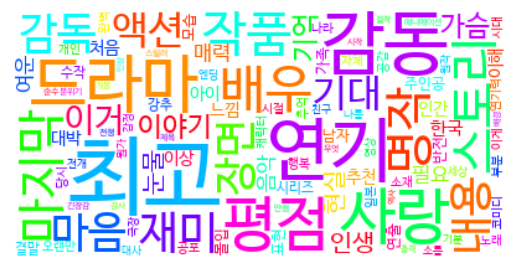

counter of mec_00: {'관객': 628, '작품': 1489, '선구안': 1, '배우': 2977, '김태희': 35, '최대': 73, '약점': 10, '사극': 114, '멘스': 19, '유치': 400, '이지현': 9, '환상': 88, '연기': 3855, '아빠': 209, '낭비': 607, '포르노': 129, '심리': 102, '묘사': 114, '중요': 200, '폭력': 128, '원작': 1122, '쓰레기': 4225, '분량': 74, '작가': 922, '발악': 27, '걸로': 164, '박현지': 27, '범죄': 187, '주인공': 1479, '회장': 29, '김치': 75, '따귀': 6, '엄마': 339, '개입': 8, '증거': 34, '현지': 14, '감방': 7, '패턴': 34, '무한': 31, '반복': 126, '종합': 38, '평점': 4752, '도저': 109, '건지': 1145, '조윤희': 5, '고문': 63, '시작': 587, '직전': 22, '몰입': 561, '머리': 370, '마지막': 1139, '청력': 1, '회복': 9, '어딘가': 26, '이상': 1495, '여배우': 308, '등등': 82, '사회부': 1, '조리': 5, '상어': 70, '하드코어': 8, '거지': 209, '디테일': 38, '장면': 1451, '제트': 6, '스키': 6, '재미': 2847, '공포': 1300, '스토리': 4498, '성룡': 186, '턱시도': 1, '감독': 3774, '택시': 48, '기사': 52, '불만': 28, '새끼': 240, '인생': 546, '최악': 2916, '개인': 363, '킬링': 545, '타임': 767, '로맨틱': 129, '코미디': 916, '개구리': 14, '자연': 125, '전편': 194, '액션': 1725, '감동': 1320, '영거': 3, '시기': 51, '이거': 22

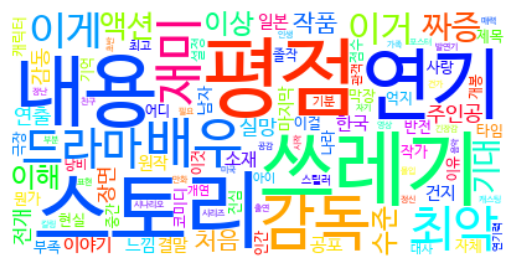

In [ ]:
# wordcloud를 뽑아 본 후 눈으로 직접 지배적인 단어 및 의미없는 단어를 확인하고 제외하여 다시 워드클라우드 생성
for count, tagger in zip([okt_count_1, okt_count_0, mec_count_1, mec_count_0], ['okt_11', 'okt_00', 'mec_11', 'mec_00']):
    # Get the total count of all keywords
    total_count = sum(count.values())

    # Set a threshold as a percentage of the total count
    threshold_percentage = 0.05  # You can adjust this value as needed

    # Extract the keywords that do not exceed the frequency threshold
    filtered_keywords = {keyword: count for keyword, count in count.items() if keyword not in ['영화', '이영화', '진짜', '정말', '이건', '보고', '완전']}
    print(f'counter of {tagger}: {filtered_keywords}')

    wordcloud(filtered_keywords, tagger)

---

## visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

rc('font', family='Noto Serif CJK JP')
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
# Get all vectors
vectors = []
for word in okt_word2vec.wv.index_to_key:
    vectors.append(okt_word2vec.wv.get_vector(word))

In [ ]:
# Get some vector of the most similar words
similar_words = okt_word2vec.wv.most_similar(positive=['황정민', '마동석'], topn=50)

vectors = []
for word in similar_words:
    vectors.append(okt_word2vec.wv.get_vector(word[0]))

In [ ]:
# Perform dimensionality reduction (e.g., PCA) on the vectors: 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(vectors)

IndexError: index 50 is out of bounds for axis 0 with size 50

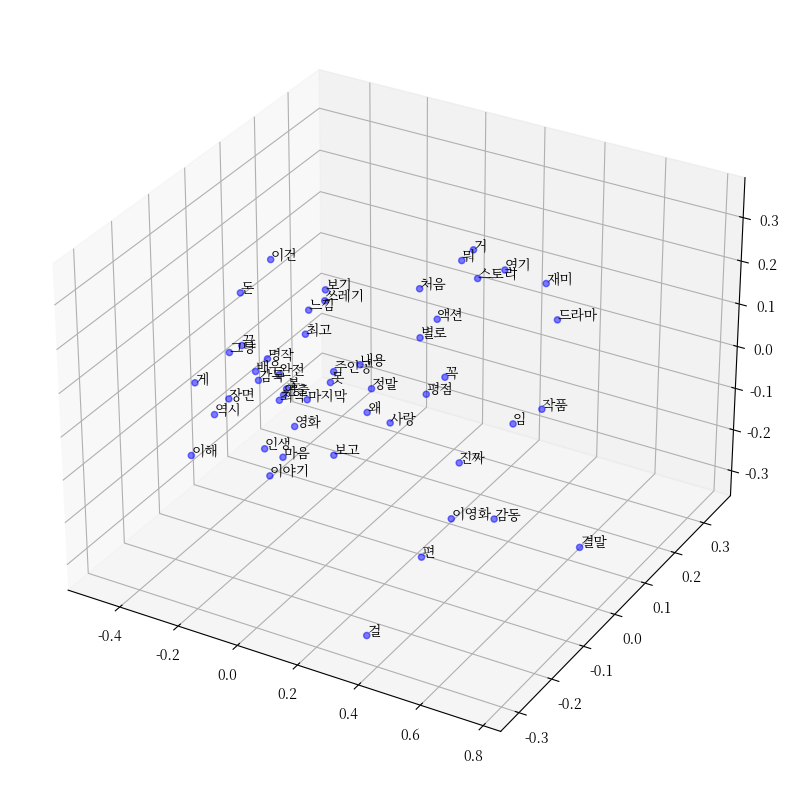

In [ ]:
# Plot the word vectors in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], c='b', alpha=0.5)

for i, word in enumerate(list(okt_word2vec.wv.index_to_key)):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Word2Vec Word Embeddings')
plt.show()

In [ ]:
# Perform dimensionality reduction (e.g., PCA) on the vectors: 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

IndexError: index 50 is out of bounds for axis 0 with size 50

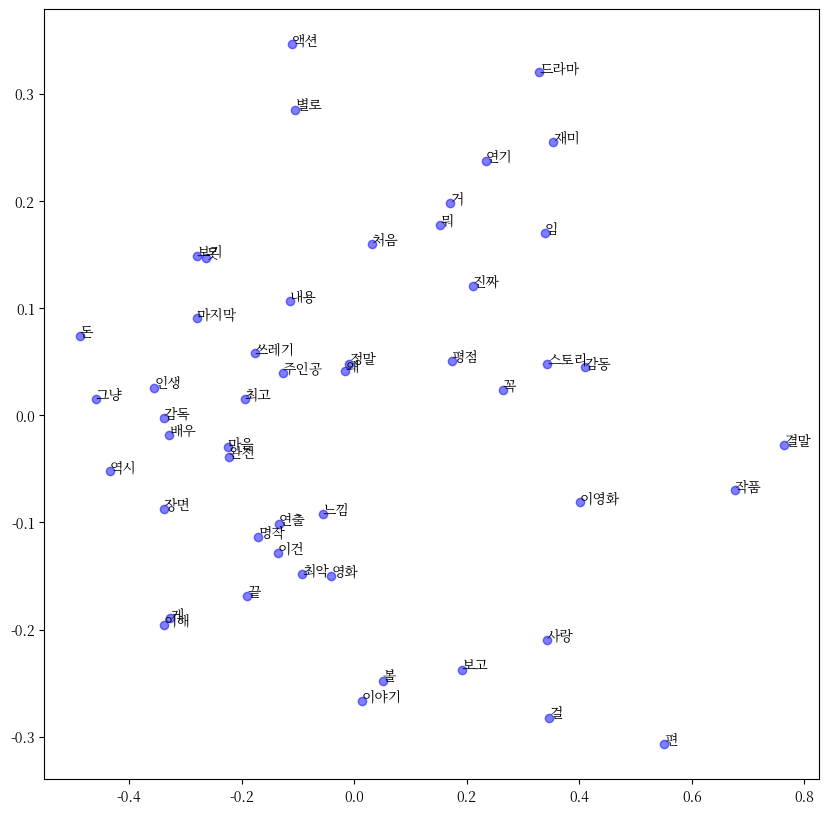

In [ ]:
# Plot the word vectors in 2D
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='b', alpha=0.5)
for i, word in enumerate(list(okt_word2vec.wv.index_to_key)):
    plt.text(vectors_2d[i, 0], vectors_2d[i, 1], word)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Word Embeddings')
plt.savefig('/home/kyuyeon/문서/kmu/23-1/bigdata-latest/movie/embedding.png', dpi=300)
# plt.show()